In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

# Load the train.parquet file

In [2]:
df_train = pd.read_parquet("./Dataset_parquet/train.parquet")

# Convert the dataframe to a CSV file

In [3]:
df_train.to_csv("./Dataset_csv/train.csv", index=False)

# Load the test.parquet file

In [4]:
df_test = pd.read_parquet("./Dataset_parquet/test.parquet")

# Convert the dataframe to a CSV file

In [5]:
df_test.to_csv("./Dataset_csv/test.csv", index=False)

# Load the train file

In [6]:
df = pd.read_csv("./Dataset_csv/train.csv")

# Check for missing values

In [7]:
print(df.isnull().sum())

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64


# Create a function to assign the price scale based on the price

In [8]:
'''def assign_price_scale(price):
    if price >= 0 and price <= 999:
        return 'low'
    elif price >= 1000 and price <= 1999:
        return 'medium'
    elif price >= 2000:
        return 'high' '''

"def assign_price_scale(price):\n    if price >= 0 and price <= 999:\n        return 'low'\n    elif price >= 1000 and price <= 1999:\n        return 'medium'\n    elif price >= 2000:\n        return 'high' "

# Apply the function to the 'price' column and create a new column 'price_scale'

In [9]:
'''df['price_scale'] = df['price'].apply(lambda x: assign_price_scale(x))'''

"df['price_scale'] = df['price'].apply(lambda x: assign_price_scale(x))"

# Print the first few rows of the dataframe to check if the new column was created correctly

In [10]:
'''print(df.head())'''

'print(df.head())'

# MODIFICATION: 
[https://soyhenry.slack.com/archives/C03UYCDH8NN/p1674509452835809](https://soyhenry.slack.com/archives/C03UYCDH8NN/p1674509452835809)

now the scale for "price_scale" colum is in the range of low-notlow
### NEW RETURN: low = 0, notlow = 1

# Create a function to assign the price scale based on the price

In [11]:
def assign_price_scale(price):
    if price >= 0 and price <= 999:
        return 1 # low
    else:
        return 0 # not low


# Apply the function to the 'price' column and create a new column 'price_scale'

In [12]:
df['price_scale'] = df['price'].apply(lambda x: assign_price_scale(x))

# Print the first few rows of the dataframe to check if the new column was created correctly

In [13]:
print(df.head())

           id                                                url  \
0  7048013474  https://boise.craigslist.org/apa/d/very-nice-b...   
1  7043931179  https://cosprings.craigslist.org/apa/d/colorad...   
2  7048254516  https://norfolk.craigslist.org/apa/d/virginia-...   
3  7041032577  https://phoenix.craigslist.org/nph/apa/d/phoen...   
4  7048588701  https://nashville.craigslist.org/apa/d/antioch...   

                    region                        region_url  price  \
0                    boise      https://boise.craigslist.org   1350   
1         colorado springs  https://cosprings.craigslist.org   1115   
2  norfolk / hampton roads    https://norfolk.craigslist.org   1129   
3                  phoenix    https://phoenix.craigslist.org   1580   
4                nashville  https://nashville.craigslist.org    995   

        type  sqfeet  beds  baths  cats_allowed  ...  electric_vehicle_charge  \
0      house    1200     2    2.0             1  ...                        0   
1 

# More exploration:
## Replacing missing values

# Check unique values in 'laundry_options' column

In [14]:
print("Unique values in 'laundry_options' column:", df['laundry_options'].unique())

Unique values in 'laundry_options' column: ['w/d in unit' 'w/d hookups' 'laundry on site' nan 'laundry in bldg'
 'no laundry on site']


# Check unique values in 'parking_options' column

In [15]:
print("Unique values in 'parking_options' column:", df['parking_options'].unique())

Unique values in 'parking_options' column: ['detached garage' 'carport' 'off-street parking' nan 'attached garage'
 'street parking' 'no parking' 'valet parking']


# Strategy:
## Replace null in the "laundry_options" and "parking_options" for "unknown" value for further analisys

# Replace null values in 'laundry_options' column with 'unknown'

In [16]:
df['laundry_options'] = df['laundry_options'].fillna('unknown')

# Replace null values in 'parking_options' column with 'unknown'

In [17]:
df['parking_options'] = df['parking_options'].fillna('unknown')

# Check:

# Check if there are any remaining null values in the 'laundry_options' column

In [18]:
print(df['laundry_options'].isnull().sum())

0


# Check if there are any remaining null values in the 'parking_options' column

In [19]:
print(df['parking_options'].isnull().sum())

0


# Display rows without gps cordinates

# Get the rows with null values in 'lat' and 'long' columns

In [20]:
null_lat_long_df = df.loc[(df['lat'].isnull()) & (df['long'].isnull())]

# Print the dataframe

In [21]:
print(null_lat_long_df)

                id                                                url  \
62      7030417516  https://worcester.craigslist.org/apa/d/fabulou...   
369     7046724271  https://grandrapids.craigslist.org/apa/d/walk-...   
501     7046978803  https://denver.craigslist.org/apa/d/1-months-f...   
841     7044475894  https://columbia.craigslist.org/apa/d/view-our...   
976     7046827868  https://sarasota.craigslist.org/apa/d/rent-lov...   
...            ...                                                ...   
345789  7040091805  https://toledo.craigslist.org/apa/d/newly-list...   
345847  7033042711  https://huntsville.craigslist.org/apa/d/come-s...   
345856  7049041897  https://lubbock.craigslist.org/apa/d/completel...   
345995  7043301388  https://sarasota.craigslist.org/apa/d/large-ho...   
346110  7044596360  https://panamacity.craigslist.org/apa/d/profes...   

                        region                          region_url  price  \
62      worcester / central MA    https://worc

# Display map usin folium to check the scope

# Lat and Long variables

In [22]:
latitude = df['lat'].mean()
longitude = df['long'].mean()
m = folium.Map(location=[latitude, longitude], zoom_start=13)

# Create a map object

In [23]:
m = folium.Map(location=[latitude, longitude], zoom_start=13)

# Add a marker to the map

In [24]:
folium.Marker(location=[latitude, longitude]).add_to(m)

# Display the map

In [25]:
m

# Due to performance problems
## I had to che the map ploting in a diferent file

# Creation of a new dataframe just for id, lat and long

In [26]:
cord_df = df[['id', 'lat', 'long']]

# Display head and tail for check

# Display the first 5 rows of the dataframe

In [27]:
print(cord_df.head())

           id      lat      long
0  7048013474  43.5851 -116.2250
1  7043931179  38.9137 -104.7800
2  7048254516  36.7922  -76.1643
3  7041032577  33.5623 -112.0560
4  7048588701  36.0595  -86.6592


# Display the last 5 rows of the dataframe

In [28]:
print(cord_df.tail())

                id      lat      long
346474  7050982281  37.9591  -87.5293
346475  7049418251  32.6279 -117.0370
346476  7048268235  33.9659  -80.9355
346477  7026721229  48.1995 -101.2800
346478  7049657819  42.8997  -78.8803


# Export cord_df as a .csv file to che it in the new .py file

In [29]:
cord_df.to_csv('./Map_check/train_only_cordinates.csv', index=False)

# Display df types

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

# Analisys number of duplicates per colum

# First chek all rows

In [31]:
row_count = df.shape[0]
print(row_count)

346479


# Duplicates in "image_url"

In [32]:
duplicates_mask = df['image_url'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate image_url:", duplicates_count)

Number of duplicate image_url: 178233


# Duplicates in "region_url"

In [33]:
duplicates_mask = df['region_url'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate region_url:", duplicates_count)

Number of duplicate region_url: 346066


# Duplicates in "url"

In [34]:
duplicates_mask = df['url'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate url:", duplicates_count)

Number of duplicate url: 0


# Duplicates in "description"

In [35]:
duplicates_mask = df['description'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate description:", duplicates_count)

Number of duplicate description: 91488


# Duplicates in "lat"

In [36]:
duplicates_mask = df['lat'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate lat:", duplicates_count)

Number of duplicate lat: 292656


# Duplicates in "long"

In [37]:
duplicates_mask = df['long'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate long:", duplicates_count)

Number of duplicate long: 295349


# Drop duplicate rows fitering by image_url

In [38]:
df = df.drop_duplicates(subset=['image_url'], keep='first')

# Rechek all rows

In [39]:
row_count = df.shape[0]
print(row_count)

168246


# Duplicates in "image_url"

In [40]:
duplicates_mask = df['image_url'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate image_url:", duplicates_count)

Number of duplicate image_url: 0


# Duplicates in "region_url"

In [41]:
duplicates_mask = df['region_url'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate region_url:", duplicates_count)

Number of duplicate region_url: 167833


# Duplicates in "url"

In [42]:
duplicates_mask = df['url'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate url:", duplicates_count)

Number of duplicate url: 0


# Duplicates in "description"

In [43]:
duplicates_mask = df['description'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate description:", duplicates_count)

Number of duplicate description: 19315


# Duplicates in "lat"

In [44]:
duplicates_mask = df['lat'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate lat:", duplicates_count)

Number of duplicate lat: 117672


# Duplicates in "long"

In [45]:
duplicates_mask = df['long'].duplicated()
duplicates_count = duplicates_mask.sum()
print("Number of duplicate long:", duplicates_count)

Number of duplicate long: 120538


# Print the list of columns

In [46]:
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'price_scale'],
      dtype='object')


# Iterate over each column in the DataFrame

In [47]:
for col in df.columns:
    # Print the unique values and type for the current column
    print("Unique values in '{}' column: {}".format(col, df[col].unique()))
    print("Type of '{}' column: {}".format(col, df[col].dtype))

Unique values in 'id' column: [7048013474 7043931179 7048254516 ... 7045689575 7049418251 7049657819]
Type of 'id' column: int64
Unique values in 'url' column: ['https://boise.craigslist.org/apa/d/very-nice-bench-house-for-rent/7048013474.html'
 'https://cosprings.craigslist.org/apa/d/colorado-springs-rare-vacancy-in-this/7043931179.html'
 'https://norfolk.craigslist.org/apa/d/virginia-beach-2-bed-2-bath-ready-to/7048254516.html'
 ...
 'https://boston.craigslist.org/gbs/apa/d/brookline-newly-renovated-brookline-1/7045689575.html'
 'https://sandiego.craigslist.org/ssd/apa/d/chula-vista-beautifully-upgraded-2bd-2ba/7049418251.html'
 'https://buffalo.craigslist.org/apa/d/buffalo-allentown-huge-2bed-2fplc-wash/7049657819.html']
Type of 'url' column: object
Unique values in 'region' column: ['boise' 'colorado springs' 'norfolk / hampton roads' 'phoenix'
 'nashville' 'dallas / fort worth' 'worcester / central MA' 'wichita'
 'scranton / wilkes-barre' 'maine' 'south coast' 'north mississippi'


# Replace the Null values in "lat" & "long" colums with general cordinates using the "satate" colum

# Create a dictionary to map state abbreviation to coordinates

In [48]:
state_coords = {
    'id': (43.6137, -116.2034),
    'co': (39.5501, -105.7821),
    'va': (37.7693, -78.1700),
    'az': (34.2744, -111.6602),
    'tn': (35.7478, -86.6923),
    'tx': (31.9686, -99.9018),
    'ma': (42.4072, -71.3824),
    'ks': (38.5111, -98.2883),
    'pa': (40.5773, -77.264),
    'me': (45.2538, -69.4455),
    'ms': (32.7416, -89.6787),
    'la': (31.1801, -91.8749),
    'mn': (46.729553, -94.6859),
    'ky': (37.669, -84.6514),
    'wa': (47.7511, -120.7401),
    'al': (32.806671, -86.791130),
    'ca': (37.271875, -119.270415),
    'ga': (32.678125, -83.223905),
    'nc': (35.787743, -78.634106),
    'md': (39.045755, -76.641271),
    'ia': (41.9383, -93.0977),
    'fl': (27.994402, -81.760254),
    'or': (43.804133, -120.554201),
    'ar': (34.799999, -92.199997),
    'hi': (19.8968, -155.5828),
    'nj': (40.143006, -74.731116),
    'ut': (39.419220, -111.950684),
    'wv': (38.597626, -80.454903),
    'ny': (42.165726, -74.948051),
    'sc': (33.836081, -81.1637245),
    'oh': (40.417287, -82.907123),
    'mo': (38.573936, -92.60376),
    'mi': (44.314844, -85.602364),
    'ak': (61.3850, -152.2683),
    'sd': (44.2126, -99.4388),
    'ok': (35.5376, -96.9000)
}

# Get the rows where 'lat' is null

In [49]:
null_lat_rows = df[df['lat'].isnull()]

# Iterate over the rows where 'lat' is null

In [50]:
for index, row in null_lat_rows.iterrows():
    # Get the state abbreviation from the 'state' column
    state_abbr = row['state']
    if state_abbr in state_coords:
        # Look up the coordinates for the state abbreviation in the dictionary
        lat = state_coords[state_abbr][0]
        # Update the 'lat' column for the current row
        df.loc[index, 'lat'] = lat

# Get the rows where 'long' is null

In [51]:
null_long_rows = df[df['long'].isnull()]

# Iterate over the rows where 'long' is null

In [52]:
for index, row in null_long_rows.iterrows():
    # Get the state abbreviation from the 'state' column
    state_abbr = row['state']
    if state_abbr in state_coords:
        # Look up the coordinates for the state abbreviation in the dictionary
        long = state_coords[state_abbr][1]
        # Update the 'long' column for the current row
        df.loc[index, 'long'] = long

# Check for missing values

In [53]:
print(df.isnull().sum())

id                           0
url                          0
region                       0
region_url                   0
price                        0
type                         0
sqfeet                       0
beds                         0
baths                        0
cats_allowed                 0
dogs_allowed                 0
smoking_allowed              0
wheelchair_access            0
electric_vehicle_charge      0
comes_furnished              0
laundry_options              0
parking_options              0
image_url                    0
description                  1
lat                        105
long                       105
state                        0
price_scale                  0
dtype: int64


# Create a boolean mask to select the rows that meet the conditions

In [54]:
mask = (df['lat'] > 55) | (df['lat'] < 20) | (df['long'] > -55) | (df['long'] < -130) | ~df['state'].isin(state_coords.keys())

# Use the mask to select the rows to drop

In [55]:
df_to_drop = df.loc[mask]

# Use the drop method to remove the selected rows from the DataFrame

In [56]:
df = df.drop(df_to_drop.index)

# Check for missing values

In [57]:
print(df.isnull().sum())

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                1
lat                        0
long                       0
state                      0
price_scale                0
dtype: int64


# Display df info

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141847 entries, 0 to 346478
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       141847 non-null  int64  
 1   url                      141847 non-null  object 
 2   region                   141847 non-null  object 
 3   region_url               141847 non-null  object 
 4   price                    141847 non-null  int64  
 5   type                     141847 non-null  object 
 6   sqfeet                   141847 non-null  int64  
 7   beds                     141847 non-null  int64  
 8   baths                    141847 non-null  float64
 9   cats_allowed             141847 non-null  int64  
 10  dogs_allowed             141847 non-null  int64  
 11  smoking_allowed          141847 non-null  int64  
 12  wheelchair_access        141847 non-null  int64  
 13  electric_vehicle_charge  141847 non-null  int64  
 14  come

# Drop missing values in "description"

In [59]:
df = df.dropna(subset=['description'])

# Display info

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141846 entries, 0 to 346478
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       141846 non-null  int64  
 1   url                      141846 non-null  object 
 2   region                   141846 non-null  object 
 3   region_url               141846 non-null  object 
 4   price                    141846 non-null  int64  
 5   type                     141846 non-null  object 
 6   sqfeet                   141846 non-null  int64  
 7   beds                     141846 non-null  int64  
 8   baths                    141846 non-null  float64
 9   cats_allowed             141846 non-null  int64  
 10  dogs_allowed             141846 non-null  int64  
 11  smoking_allowed          141846 non-null  int64  
 12  wheelchair_access        141846 non-null  int64  
 13  electric_vehicle_charge  141846 non-null  int64  
 14  come

# Check for missing values

In [61]:
print(df.isnull().sum())

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
price_scale                0
dtype: int64


In [62]:
for col in df.columns:
    print("Unique values in '{}' column: {}".format(col, df[col].unique()))


Unique values in 'id' column: [7048013474 7043931179 7048254516 ... 7045689575 7049418251 7049657819]
Unique values in 'url' column: ['https://boise.craigslist.org/apa/d/very-nice-bench-house-for-rent/7048013474.html'
 'https://cosprings.craigslist.org/apa/d/colorado-springs-rare-vacancy-in-this/7043931179.html'
 'https://norfolk.craigslist.org/apa/d/virginia-beach-2-bed-2-bath-ready-to/7048254516.html'
 ...
 'https://boston.craigslist.org/gbs/apa/d/brookline-newly-renovated-brookline-1/7045689575.html'
 'https://sandiego.craigslist.org/ssd/apa/d/chula-vista-beautifully-upgraded-2bd-2ba/7049418251.html'
 'https://buffalo.craigslist.org/apa/d/buffalo-allentown-huge-2bed-2fplc-wash/7049657819.html']
Unique values in 'region' column: ['boise' 'colorado springs' 'norfolk / hampton roads' 'phoenix'
 'nashville' 'dallas / fort worth' 'worcester / central MA' 'wichita'
 'scranton / wilkes-barre' 'maine' 'south coast' 'north mississippi'
 'abilene' 'new orleans' 'rochester' 'louisville' 'seatt

# Heatmap

# Create a heatmap of the DataFrame

C:\Users\miauchis\AppData\Local\Temp\ipykernel_8484\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

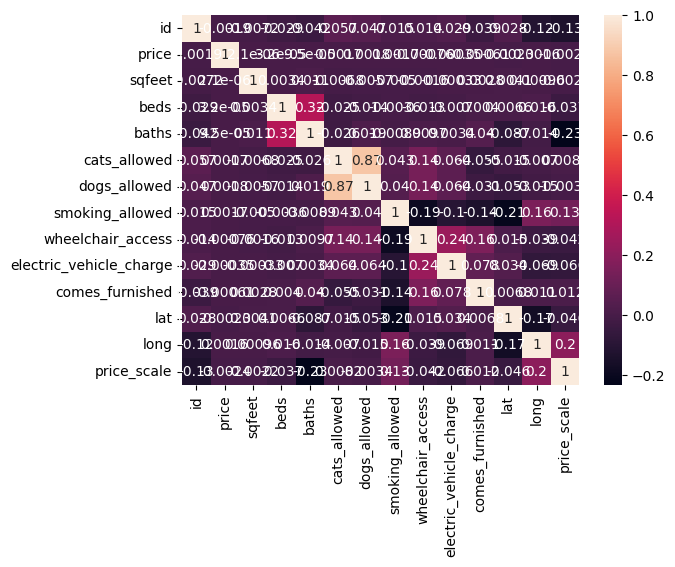

In [63]:
sns.heatmap(df.corr(), annot=True)

# Categorical colums into numericals

In [64]:
df['url_encoded'] = pd.factorize(df['url'])[0]
df['region_encoded'] = pd.factorize(df['region'])[0]
df['region_url_encoded'] = pd.factorize(df['region_url'])[0]
df['type_encoded'] = pd.factorize(df['type'])[0]
df['laundry_options_encoded'] = pd.factorize(df['laundry_options'])[0]
df['parking_options_encoded'] = pd.factorize(df['parking_options'])[0]
df['image_url_encoded'] = pd.factorize(df['image_url'])[0]
df['state_encoded'] = pd.factorize(df['state'])[0]

# Anothe Heatmap

C:\Users\miauchis\AppData\Local\Temp\ipykernel_8484\4262471806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={"size": 5}, fmt='.2f')


<AxesSubplot: >

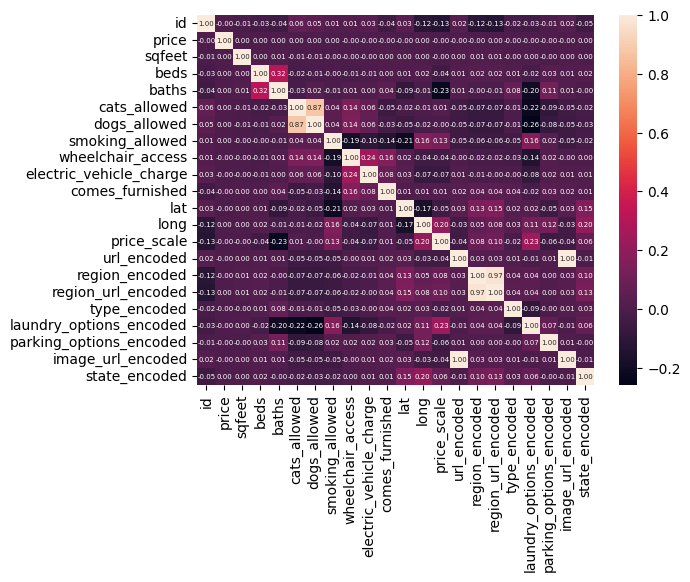

In [65]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 5}, fmt='.2f')


# Correlation matrix for "price_scale" column

In [66]:
corr_matrix = df.corr()
print(corr_matrix['price_scale'])

id                        -0.133181
price                     -0.002353
sqfeet                    -0.002221
beds                      -0.036838
baths                     -0.231864
cats_allowed               0.008237
dogs_allowed              -0.003425
smoking_allowed            0.129589
wheelchair_access         -0.041756
electric_vehicle_charge   -0.065503
comes_furnished            0.012228
lat                       -0.046424
long                       0.204623
price_scale                1.000000
url_encoded               -0.039973
region_encoded             0.083624
region_url_encoded         0.096564
type_encoded              -0.016080
laundry_options_encoded    0.230997
parking_options_encoded   -0.057888
image_url_encoded         -0.039973
state_encoded              0.062796
Name: price_scale, dtype: float64


C:\Users\miauchis\AppData\Local\Temp\ipykernel_8484\740878633.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


# Drop unusefull colums

In [67]:
df = df.drop(columns=['id', 'state', 'parking_options', 'laundry_options', 'region', 'type', 'url_encoded', 'url', 'region_url_encoded', 'region_url', 'price', 'image_url_encoded', 'image_url', 'description'])

# Display df info

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141846 entries, 0 to 346478
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sqfeet                   141846 non-null  int64  
 1   beds                     141846 non-null  int64  
 2   baths                    141846 non-null  float64
 3   cats_allowed             141846 non-null  int64  
 4   dogs_allowed             141846 non-null  int64  
 5   smoking_allowed          141846 non-null  int64  
 6   wheelchair_access        141846 non-null  int64  
 7   electric_vehicle_charge  141846 non-null  int64  
 8   comes_furnished          141846 non-null  int64  
 9   lat                      141846 non-null  float64
 10  long                     141846 non-null  float64
 11  price_scale              141846 non-null  int64  
 12  region_encoded           141846 non-null  int64  
 13  type_encoded             141846 non-null  int64  
 14  laun

# Save cleaned df as .csv

In [69]:
df.to_csv('./clean_files/train_clean.csv', index=False)

# Importing test.csv for normalization

In [70]:
df_test = pd.read_csv('./Dataset_csv/test.csv')

# Categorical colums into numericals for df_test

In [71]:
df_test['url_encoded'] = pd.factorize(df_test['url'])[0]
df_test['region_encoded'] = pd.factorize(df_test['region'])[0]
df_test['region_url_encoded'] = pd.factorize(df_test['region_url'])[0]
df_test['type_encoded'] = pd.factorize(df_test['type'])[0]
df_test['laundry_options_encoded'] = pd.factorize(df_test['laundry_options'])[0]
df_test['parking_options_encoded'] = pd.factorize(df_test['parking_options'])[0]
df_test['image_url_encoded'] = pd.factorize(df_test['image_url'])[0]
df_test['state_encoded'] = pd.factorize(df_test['state'])[0]

# Drop unusefull colums for df_test

In [72]:
df_test = df_test.drop(columns=['id', 'state', 'parking_options', 'laundry_options', 'region', 'type', 'url_encoded', 'url', 'region_url_encoded', 'region_url', 'image_url_encoded', 'image_url', 'description'])

# Save cleaned df_test as .csv

In [73]:
df_test.to_csv('./Clean_files/test_clean.csv', index=False)